In [37]:
# William Barker
# DSC 530
# Week 12 Final Project

import os

from os.path import basename, exists

In [38]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [39]:
import thinkstats2
import thinkplot
import numpy as np
import pandas as pd

In [ ]:
# There has been a long-running myth/stereotype that the further south you go in a city the more poor or worse it becomes.
# Many comedy shows like American Dad or Family Guy make jokes related to this myth but I hypothesis that the geographical
# location of a city is actually irrelevant to well off that part of the city is. Using data on the amount of homeless students
# enrolled in public schools and public charter schools in the DC area, we will try and see if homelessness is more common
# further south in the city compared to up north.

In [40]:
# Variables used are school_code, homeless_enrollment, total_enrollment, latitude, and longitude

In [41]:
# school_code is the code name of the school
# homeless_enrollment is the amount of homeless students enrolled at each school
# total_enrollment is the total amount of students enrolled at the school
# latitude is the latitude of the school
# longtitude is the longtide of the school

In [48]:
homeless = pd.read_csv("/Users/wcb14/Downloads/HomelessEnroll_BySchool_SY1213.csv")

In [49]:
print(homeless)

     School Code                                        School Name  \
0            202                                           AITON ES   
1            203                                   AMIDON BOWEN  ES   
2            450                                       ANACOSTIA HS   
3            140  APPLETREE EARLY LEARNING CENTER PCS COLUMBIA H...   
4            181                            ARTS AND TECHNOLOGY PCS   
..           ...                                                ...   
111          335                                        WHEATLEY EC   
112          210                             WILLIAM E. DOAR JR PCS   
113          463                                          WILSON HS   
114          355                                         WINSTON EC   
115          464                                     WOODSON H D HS   

     Homeless Enrollment  Total Enrollment   latitude  longitude  
0                     27               252  38.897002 -76.933701  
1            

In [50]:
homeless.head()

,School Code,School Name,Homeless Enrollment,Total Enrollment,latitude,longitude
0,202,AITON ES,27,252,38.897002,-76.933701
1,203,AMIDON BOWEN ES,33,293,38.879515,-77.018125
2,450,ANACOSTIA HS,90,697,38.870084,-76.983077
3,140,APPLETREE EARLY LEARNING CENTER PCS COLUMBIA H...,10,161,38.925244,-77.032744
4,181,ARTS AND TECHNOLOGY PCS,10,629,38.891948,-76.924645


Text(0.5, 1.0, 'School Codes')

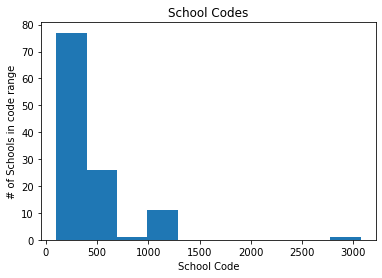

In [70]:
# The histogram for the School Codes variable

import matplotlib.pyplot as plt
sc = plt.hist(homeless["School Code"])
plt.xlabel('School Code')
plt.ylabel('# of Schools in code range')
plt.title('School Codes')

Text(0.5, 1.0, 'Homeless Students')

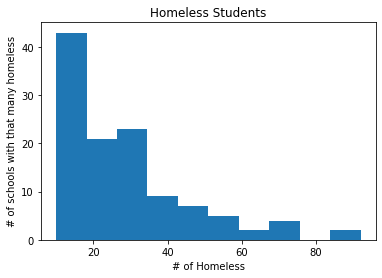

In [71]:
# The histogram for the Homeless Enrollment variable

hs = plt.hist(homeless["Homeless Enrollment"])
plt.xlabel('# of Homeless')
plt.ylabel('# of schools with that many homeless')
plt.title('Homeless Students')

Text(0.5, 1.0, 'Total Enrollment')

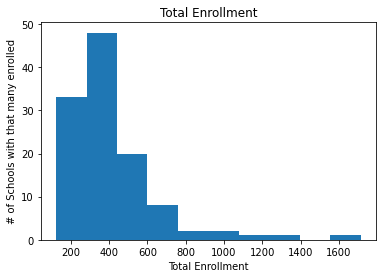

In [72]:
# The histogram for the Total Enrollment variable

te = plt.hist(homeless["Total Enrollment"])
plt.xlabel('Total Enrollment')
plt.ylabel('# of Schools with that many enrolled')
plt.title('Total Enrollment')

Text(0.5, 1.0, 'Latitudes')

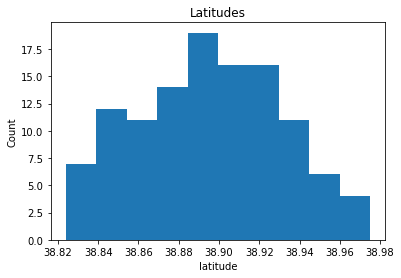

In [73]:
# The histogram for the latitude variable

la = plt.hist(homeless["latitude"])
plt.xlabel('latitude')
plt.ylabel('Count')
plt.title('Latitudes')

Text(0.5, 1.0, 'Longitudes')

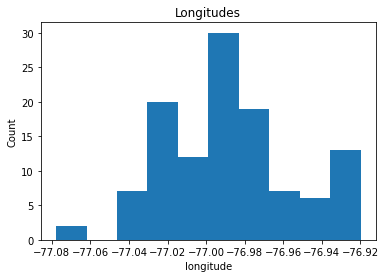

In [74]:
#The histogram for the longitude variable

lo = plt.hist(homeless["longitude"])
plt.xlabel('longitude')
plt.ylabel('Count')
plt.title('Longitudes')

In [87]:
# Mean, mode, spread and tails of the school code variable

import statistics
print(statistics.mean(homeless['School Code']))
print(statistics.mode(homeless['School Code']))
print(statistics.variance(homeless['School Code']))
print(min(homeless['School Code']))
print(max(homeless['School Code']))

401.41379310344826
202
133933.67076461768
102
3070


In [88]:
# Mean, mode, spread and tails of the homeless enrollment variable

print(statistics.mean(homeless['Homeless Enrollment']))
print(statistics.mode(homeless['Homeless Enrollment']))
print(statistics.variance(homeless['Homeless Enrollment']))
print(min(homeless['Homeless Enrollment']))
print(max(homeless['Homeless Enrollment']))

28.29310344827586
12
304.66116941529236
10
92


In [89]:
# Mean, mode, spread and tails of the total enrollment variable

print(statistics.mean(homeless['Total Enrollment']))
print(statistics.mode(homeless['Total Enrollment']))
print(statistics.variance(homeless['Total Enrollment']))
print(min(homeless['Total Enrollment']))
print(max(homeless['Total Enrollment']))

408.98275862068965
308
52049.095352323835
124
1713


In [90]:
# Mean, mode, spread and tails of the latitude variable

print(statistics.mean(homeless['latitude']))
print(statistics.mode(homeless['latitude']))
print(statistics.variance(homeless['latitude']))
print(min(homeless['latitude']))
print(max(homeless['latitude']))

38.89530891612069
38.88262754
0.001328908448092959
38.82390393
38.97504287


In [91]:
# Mean, mode, spread and tails of the longitude variable

print(statistics.mean(homeless['longitude']))
print(statistics.mode(homeless['longitude']))
print(statistics.variance(homeless['longitude']))
print(min(homeless['longitude']))
print(max(homeless['longitude']))

-76.98844119025863
-76.93439427
0.0011183408606399324
-77.0777757
-76.91992701


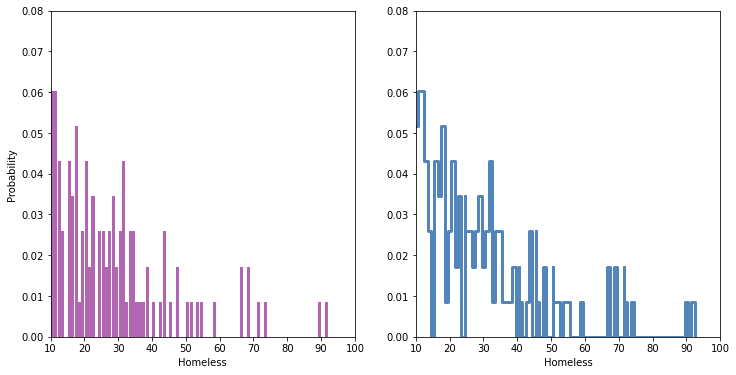

<Figure size 576x432 with 0 Axes>

In [105]:
# Creating a pmf of homeless students campared to all other students

first_pmf = thinkstats2.Pmf(homeless['Homeless Enrollment'])
other_pmf = thinkstats2.Pmf(homeless['Total Enrollment'])
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', color='purple', edgecolor='black')
thinkplot.Hist(other_pmf, align='left', color='blue')
thinkplot.Config(xlabel='Homeless', ylabel='Probability', axis=[10, 100, 0, 0.08])
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Show(xlabel='Homeless', axis=[10, 100, 0, 0.08])

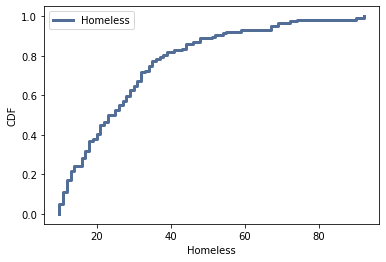

<Figure size 576x432 with 0 Axes>

In [106]:
# Creating a cdf of the homeless enrollment variable
# The curve is highly abnormal with lower values rising quickly before beginning to platue. 
# It appears that having more than 40 homeless students is uncommon

cdf = thinkstats2.Cdf(homeless['Homeless Enrollment'], label='Homeless')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Homeless', ylabel='CDF')

Mean, Var 27.894736842105264 268.63804247460763
Sigma 16.390181282542535


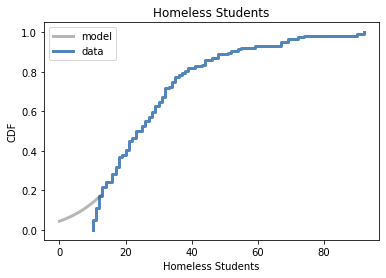

In [109]:
# Creating and plotting an analytical distribution 
# Our plot was mostly aligned with the normal distribution model with the exception of the left tail
# This can be attributed to the fact that any schools with less than 10 homeless students were ommitted from the data,
# in an attempt to protect those students privacy as that could could make it easier to identify them.

mu, var = thinkstats2.TrimmedMeanVar(homeless['Homeless Enrollment'], p=0.01)
print("Mean, Var", mu, var)

# plot the model
sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label="model", color="0.6")

# plot the data
cdf = thinkstats2.Cdf(homeless['Homeless Enrollment'], label="data")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="Homeless Students", xlabel="Homeless Students", ylabel="CDF")

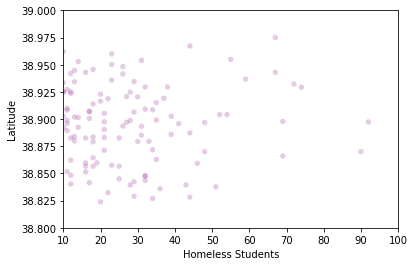

<Figure size 576x432 with 0 Axes>

In [118]:
# Creating a scatterplot comparing two variables

nohome = homeless['Homeless Enrollment']
lat = homeless['latitude']
thinkplot.Scatter(nohome, lat, color='purple', alpha=0.2)
thinkplot.Show(xlabel='Homeless Students', ylabel='Latitude', axis=[10, 100, 38.8, 39.0])

In [119]:
# Define the covariance function

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [120]:
# Find the covariance

Cov(nohome, lat)

0.019656337602556872

In [121]:
# Define the Pearsons Correlation function

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [122]:
# Find Pearsons Correlation
# Based on the covariance and correlation given for the homeless enrollment and latitude variables, we can infer that there is
# essentially no correlation between the variables. Checking for the scatterplot for any possible nonlinear correlation
# confirms that any correlation seems to be non-existant.

Corr(nohome, lat)

0.031160661456378587

In [155]:
# Creating a class and defining functions within it to perform a test on the hypothesis that latitude
# and homelessness are related.

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [156]:
# the p-value being so high indicates that their is no correlation

data = nohome.values, lat.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.736

In [163]:
# Conducting a regression analysis on the homeless enrollment and latitude variables

import statsmodels.formula.api as smf

formula = 'nohome ~ lat'
model = smf.ols(formula, data=homeless)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 nohome   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.1108
Date:                Fri, 18 Nov 2022   Prob (F-statistic):              0.740
Time:                        22:08:04   Log-Likelihood:                -495.75
No. Observations:                 116   AIC:                             995.5
Df Residuals:                     114   BIC:                             1001.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -552.0234   1743.392     -0.317      0.752   -4005.670    2901.623
lat           14.9200     44.823      0.333      0.740     -73.873     103.713
==============================================================================
Omnibus:                       37.126   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.251
Skew:                           1.460   Prob(JB):                     1.84e-14
Kurtosis:                       5.134   Cond. No.                     4.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Summary

# From the EDA performed on the dataset we used we can infer that there is no statistacal significance between homeless
# students and how south or north in a city the school is. However after completing this project I realize that that analysis
# is a weak one, considering we only looks at data from one city as a city of hundreds accross the United States, and
# considering school with fewer than 10 homeless students were ommitted from the data to protect those students identities.

# Something missing from my analysis that I forgot to consider until now was that my analysis only compared the number of
# homeless students to its geographical latitude (whether the school was more north or south in the city). I'm just now
# realizing that this is an unfair way to look at the data, since some schools have many more students than others, which
# in return would logically lead to a higher amount of homeless students. If I was to go back and redo my analysis I would 
# try and create a new variable to compare with latitude, which would be the percentage of homeless students compared to 
# the total amount of students enrolled, and then see if, percentage wise, schools further south had more homeless than up
# north. 

# Variables that could have helped during analysis include the one previously mentioned of the percentage of homeless students
# to total students enrolled, as well as a variable that showed how much government funding each school was recieving.
# Schools further north recieving more funding than schools further south could also be an indicator that northern parts of
# cities tend to be the nicer areas. It could also have been useful to have a variable showing average household income of 
# students of each school for a similar reason. 

# While the point of this analysis was to disprove any correlation between the north side or south side of cities being nicer
# or worse, with my hypothesis being that there would be no correlation between homeless students and location, I guess I still
# thought that there might be at least a tiny bit of correlation, considering most stereotypes end up based in a grain of
# truth. However the analysis did not show any real correlation at all related to the variables tested, but that could also 
# be due to the flaws in how I conducted my analysis.

# I faced a lot of challenges during this project. I had a lot of trouble from the very beginning just getting the data I found
# to use into juypiter to use and problems at first pulling specific variables out of it since they had two different names
# depending on where you looked. I also ended up using a combination of code I knew how to use, code from the textbook, 
# and ways to code things I looked up on the internet, which got pretty confusing for me quickly. While I believe I eventually
# got everything to work there were times where I wasn't 100% sure how I did, but I feel this project was a great learning
# experience for me and feel great that I managed to overcome it! :)